In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
def smooth(data, wd=2):
    """
    :param data: ndarray，一维或二维
    :param wd:
    :return:
    """
    if not (isinstance(wd, int) and wd > 0):
        raise ValueError('wd must be a positive integer')
    elif 1 == wd:
        return data
    else:
        weight = np.ones(wd) / wd
        if 1 == data.ndim:
            return np.convolve(weight, data, "valid")
        elif 2 == data.ndim:
            smooth_data = []
            for d in data:
                d = np.convolve(weight, d, "valid")
                smooth_data.append(d)
            return np.array(smooth_data)
        else:
            raise ValueError('data must be a one-dimensional or two-dimensional ndarray')

In [8]:
rewards_QEMS = np.load("QEMS_train_rewards.npy")
ma_rewards_QEMS = np.load("QEMS_train_ma_rewards.npy")
rewards_baseline1 = np.load("baseline1_train_rewards.npy")
ma_rewards_baseline1 = np.load("baseline1_train_ma_rewards.npy")

In [9]:
rewards_QEMS = smooth(rewards_QEMS,2)
ma_rewards_QEMS = smooth(ma_rewards_QEMS,5)
rewards_baseline1 = smooth(rewards_baseline1,5)
ma_rewards_baseline1 = smooth(ma_rewards_baseline1,10)

In [10]:
episode_QEMS=range(len(rewards_QEMS))
episode_ma_QEMS=range(len(ma_rewards_QEMS))
episode_baseline1=range(len(rewards_baseline1))
episode_ma_baseline1=range(len(ma_rewards_baseline1))

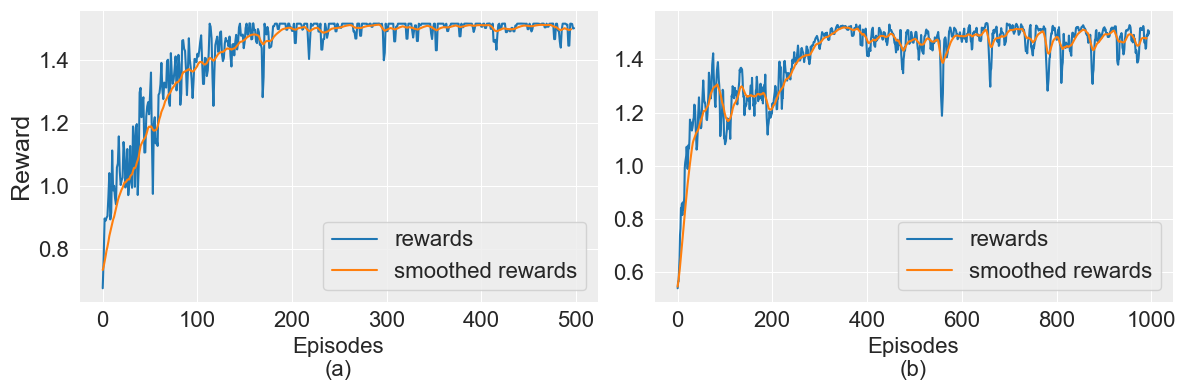

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(ax=ax[0], x=episode_QEMS, y=rewards_QEMS, label='rewards')
sns.lineplot(ax=ax[0], x=episode_ma_QEMS, y=ma_rewards_QEMS, label='smoothed rewards')
ax[0].set_ylabel("Reward", fontsize=18)
ax[0].set_xlabel("Episodes\n(a)", fontsize=16)
ax[0].legend(fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=16)

sns.lineplot(ax=ax[1], x=episode_baseline1, y=rewards_baseline1, label='rewards')
sns.lineplot(ax=ax[1], x=episode_ma_baseline1, y=ma_rewards_baseline1, label='smoothed rewards')
ax[1].set_xlabel("Episodes\n(b)", fontsize=16)
ax[1].legend(fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()

#plt.savefig("convergence.eps", dpi=1500, bbox_inches = 'tight',format="eps")
#plt.savefig("convergence.jpg", dpi=1500, bbox_inches = 'tight',format="jpg")
plt.savefig("convergence.pdf", dpi=1500, bbox_inches = 'tight',format="pdf")
plt.show()